# What is a Perceptron
A perceptron is a building block of neural network. 

A single perceptron is capable to classify an input into two classes (Binary classifier i-e 0 / 1).
![A perceptron looks like this.](./perceptron_node.png "Perceptron")

## Different parts of a perceptron:

1. Input features (X) from dataset.
2. Weights (W), one for each input feature and a bias B.
3. A Net input Function.
4. Activation Function to normalize the values between (0 - 1).
5. Output (0/1 or Yes/No or Dog/ Cat etc.)



## Sonar Dataset

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
columns = [i for i in range(1,61)]
columns.append("label")
df = pd.read_csv("sonar.all-data",delimiter = ",",names = columns,header = None)

In [3]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Replacing R with 0 and M with 1 as our perceptron can only deal with numbers.

In [4]:
df["label"].replace({'R': 0, 'M': 1},inplace = True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[columns[:-1]], df[columns[-1]], test_size=0.33, random_state=42)

In [6]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
28,0.0100,0.0275,0.0190,0.0371,0.0416,0.0201,0.0314,0.0651,0.1896,0.2668,...,0.0118,0.0088,0.0104,0.0036,0.0088,0.0047,0.0117,0.0020,0.0091,0.0058
42,0.0211,0.0319,0.0415,0.0286,0.0121,0.0438,0.1299,0.1390,0.0695,0.0568,...,0.0053,0.0090,0.0042,0.0153,0.0106,0.0020,0.0105,0.0049,0.0070,0.0080
79,0.0108,0.0086,0.0058,0.0460,0.0752,0.0887,0.1015,0.0494,0.0472,0.0393,...,0.0161,0.0029,0.0078,0.0114,0.0083,0.0058,0.0003,0.0023,0.0026,0.0027
97,0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,...,0.0268,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439
142,0.0526,0.0563,0.1219,0.1206,0.0246,0.1022,0.0539,0.0439,0.2291,0.1632,...,0.0380,0.0339,0.0149,0.0335,0.0376,0.0174,0.0132,0.0103,0.0364,0.0208


In [7]:
y_train.head()

28     0
42     0
79     0
97     1
142    1
Name: label, dtype: int64

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
X_test

array([[0.0305, 0.0363, 0.0214, ..., 0.0042, 0.0055, 0.0021],
       [0.0298, 0.0615, 0.065 , ..., 0.0049, 0.02  , 0.0073],
       [0.0139, 0.0222, 0.0089, ..., 0.0059, 0.0039, 0.0048],
       ...,
       [0.0084, 0.0153, 0.0291, ..., 0.0031, 0.0072, 0.0045],
       [0.0079, 0.0086, 0.0055, ..., 0.0058, 0.0059, 0.0032],
       [0.0206, 0.0132, 0.0533, ..., 0.018 , 0.0109, 0.007 ]])

## Weights
Let's initialize Weights for each input feature. We have 60 features so we need to define 60 wieghts.

In [10]:
W = np.random.rand(60,1)
W.shape

(60, 1)

## Bias
Let's initialize Bias.


In [11]:
b = np.random.rand()
b

0.9736634620387505

## Forward Pass
Forward pass contains two steps:
1. **Net Input Function:** where we multiply each feature x with it's corresponding weight w and then sum all of the resulting values to get a single value Z. 
2. **Activation Function:** Applying activaton funciton on Z.


### Net Input Function
We have to comput the Net Input Function for all the training samples.


![Net input function.](./NIF.png "Net input function")


In [12]:
X_train = X_train.T
X_train.shape

(60, 139)

In [13]:
X_train[0].shape

(139,)

In [14]:
numOfTrainSamples = X_train.shape[1]
numOfFeatures = X_train.shape[0]
Z = np.zeros(numOfTrainSamples)

for i in range(numOfTrainSamples):
    for j in range(numOfFeatures): 
        z = float(X_train[j][i] * W[j])
        Z[i] = Z[i]+z
    Z[i] = Z[i] + b
    

In [15]:
len(Z)

139

In [16]:
Z[:5]

array([10.60959325, 14.36197853, 10.25397586, 11.53780933, 12.63423492])

Same net input function can be computed in an optimized manner by using vectorized code.


In [17]:
W.shape

(60, 1)

In [18]:
X_train.shape

(60, 139)

In [19]:
Z = np.dot(W.T,X_train,) + b

In [20]:
Z.shape

(1, 139)

In [21]:
Z[0,:5]

array([10.60959325, 14.36197853, 10.25397586, 11.53780933, 12.63423492])

In [22]:
X_test =  X_test.T   #testing
X_test.shape

(60, 69)

In [23]:
X_test[0].shape  # for testing

(69,)

### Activation Funciton
We apply activation function to normalize the output values between 0 and 1.
Most commonly used Activation Functions are:
1. Sigmoid
2. Relu
3. Leaky Relu
4. tanh and more

We will use sigmoid for our example.


![Sigmoid function.](./sigmoid.png "Sigmoid Function")

In [24]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [25]:
A = [sigmoid(z) for z in Z[0]]

In [26]:
A[:5]

[0.9999753224819191,
 0.9999994210091164,
 0.999964784036752,
 0.9999902458632619,
 0.999996741482349]

More optimized way

In [27]:
A = sigmoid(Z)

In [28]:
A[0,:5]

array([0.99997532, 0.99999942, 0.99996478, 0.99999025, 0.99999674])

### What's Next?
We have computed the output values, now what to do with them? We need the perceptron to answer in Rock / Mine or in other words 0 / 1.
We need to apply a threshold on the output values. In most cases a threshold of 0.5 is used. All the output values greater than 0.5 will be considered as 1 and less than 0.5 will be considered as 0.

In [29]:
A = np.where(A < 0.5, 0, 1)

In [30]:
A

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1]])

In [31]:
y_train

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1])

In [32]:
print(y_train.shape)
print(A.shape)

(139,)
(1, 139)


In [33]:
y_train = np.expand_dims(y_train,axis =0)

In [34]:
y_train.shape

(1, 139)

## Output Analysis
Our perceptron has not properly categorized the input. We have a lot of errors in it. Let's correct our perceptron.


## Back Propagation
In Back propagation we compute errors / loss/ cost using a loss function and then tell each weight that how much it has contributed in the error which is done by taking partial derivative of Loss function with respect to each weight. 

### Error Functions:
1. Mean Error Loss
2. Mean Squared Error 
3. Mean Absolute Error
4. Mean Squared Logarithmic Error Loss (MSLE)
5. Mean Percentage Error
6. Mean Absolute Percentage Error
7. Binary Classification Losses Binary Cross Entropy
8. Multi-Class Cross-Entropy
9. Squared Hinge Loss
10. Hinge Loss


For our example we will be using Binary Cross Entropy Loss:
![Binary cross entropy loss.](./loss.png "Loss function")

In [35]:
def binary_cross_entropy(A, Y):
    return -(Y * np.log(A) + (1 - Y) * np.log(1 - A)).mean()

In [37]:
#J = binary_cross_entropy(A, y_train)

Our implementation of loss function cannot handle log of 0 which is equal to 1 ( log(0) = 1 ), that's why we will use library function for now.

In [38]:
from sklearn.metrics import log_loss
J = log_loss(y_train,A)

In [39]:
J

360.21659711854045

## Computing Gradients/ Slopes/ Derivatives
Below are the partial derivatives of Loss function.

![dz.](./dz.png "dz")

![dw.](./dw.png "dw")

![db.](./db.png "db")

In [40]:
dz = A - y_train

In [41]:
X_train.shape

(60, 139)

In [42]:
dz.shape

(1, 139)

We need to compute derivative of each weight for each input.

In [43]:
dw = np.zeros(len(W))
for i in range(len(W)):
    for j in range(X_train.shape[1]):
        #print(str(i)+ " "+ str(j))
        #print(X_train[i][j])
        dw[i] = dw[i] + dz[0][j]*X_train[i][j]
    dw[i] = dw[i]/X_train.shape[1]

In [44]:
dw[:5]

array([0.0104705 , 0.0154964 , 0.01788489, 0.02003237, 0.03098993])

In [45]:
numOfTrainSamples

139

More optimized way

In [46]:
dw =  np.dot(X_train,dz.T)/numOfTrainSamples

In [47]:
dw[:5]

array([[0.0104705 ],
       [0.0154964 ],
       [0.01788489],
       [0.02003237],
       [0.03098993]])

For bias we need just need the mean of sum of all dz.


In [48]:
db = np.sum(dz,axis =1)/numOfTrainSamples

## Gradient Desent Step
Now we will update all the weights according to their slopes.

**Learning Rate (alpha)**
alpha is used to control the gradients, if we keep the alpha too high our gradients will diverge from minimum and if we take the alpha too low, the gradients will converge to minimum slowly.

alpha range [0,1]

let's suppose alpha is 0.001

### Update formulas for weight and bias

![w_update.](./w_update.png "w_update")


![b_update.](./b_update.png "b_update")

In [49]:
alpha = 0.01

In [50]:
W = W - alpha * dw

In [61]:
b = b - alpha *db

## Epoch
1 Forward and 1 Backward pass is known as 1 epoch.

## Task
1. Write code to perform N number of epochs until the loss gets close to zero.
2. Compute the loss after each epcoh using sklearn loss function.
3. Once the perceptron gets trained, test the trained perceptron on testing data and report test accuracy, confusion matrix.
4. Try different values of alpha and see how it affects the training process.
5. Use the above vectorized code to make 2 layer Neural Network. 1st layer will contain 2 Perceptrons and last layer will contain 1 perceptron. See how it affects the performance using accuracy and confusion matrix.


----------------------------------------------
Task#1 Part(1) Solution 

In [52]:
# Write code to perform N number of epochs until the loss gets close to zero.
for i in range(1000):
    #forward Pass
    Z = np.dot(W.T,X_train,) +b
    A = sigmoid(Z)
    A = np.where(A < 0.5, 0, 1)

    # Backword Pass
    J = log_loss(y_train,A)
    dz = A - y_train
    dw = np.dot(X_train,dz.T)/numOfTrainSamples
    db = np.sum(dz,axis=1)/numOfTrainSamples
    W = W - alpha * dw
    b = b - alpha * db
#    print(J)
# is a training error because it is on training data set


In [53]:
print(J) # J is training Loss

1039.5110560970288


--------------------------------------------------------
Task#1 Part(2) Solution

In [54]:
# finding Testing loss on testing data
# Compute the loss after each epcoh using sklearn loss function.
Z = np.dot(W.T,X_test,) +b
A = sigmoid(Z)
A = np.where(A < 0.5, 0, 1)    


In [55]:
A

array([[1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0]])

In [56]:
A.shape

(1, 69)

In [57]:
y_test = np.expand_dims(y_test,axis = 0)

In [58]:
y_test.shape

(1, 69)

In [60]:
# Finding Test Loss

J = log_loss(y_test,A)
dz = A - y_test
dw = np.dot(y_test,dz.T)/numOfTrainSamples
db = np.sum(dz,axis=1)/numOfTrainSamples
W = W - alpha * dw
b = b - alpha * db
print(J)

515.0297666806152


-------------------------------------
Task#1 Part(3) Solution

In [ ]:
#Finding test accuracy and confusion metrix and test loss?

In [89]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron


#X = df[["mass","width","height","color_score"]]

#Y = df["fruit_label"]


#X = df["label"].replace({'R': 0, 'M': 1},inplace = True)
#X_train, X_test, y_train, y_test = train_test_split(df[columns[:-1]], df[columns[-1]], test_size=0.33, random_state=42)



#X_train = np.array(X_train)
#X_test = np.array(X_test)
#y_train = np.array(y_train)
#y_test = np.array(y_test)

#trainX = np.array(X[:50])
#trainY = np.array(Y[:50])
#testX = np.array(X[50:])
#testY = np.array(Y[50:])

#X_train
#X_test
#y_train
#y_test


classifier = J
predictions = model.predict([row])
preds = np.array(predictions)

print("Predicted Outcomes: ")
print(preds)

print("Actual Outcomes: ")
print(y_test)

print("Confusion Matrix: ")
#print(confusion_matrix(y_test,predictions))
print((y_test,predictions))

print("Accuracy Score: ")
#print(accuracy_score(y_test,predictions))
print((y_test,predictions))

Predicted Outcomes: 
[1]
Actual Outcomes: 
[[1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1
  1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0]]
Confusion Matrix: 
(array([[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 0]]), array([1]))
Accuracy Score: 
(array([[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 0]]), array([1]))


In [87]:

# # make a prediction with a perceptron model on the dataset
# from sklearn.datasets import make_classification
# from sklearn.linear_model import Perceptron
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# # define model
# model = Perceptron()
# # fit model
# model.fit(X, y)
# # define new data
# row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
# # make a prediction
# yhat = model.predict([row])
# # summarize prediction
# print('Predicted Class: %d' % yhat)

Predicted Class: 1


---------------------------------------
#TASK#1 Part(5)

In [90]:
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0
 
# test predictions
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
weights = [-0.1, 0.20653640140000007, -0.23418117710000003]
for row in dataset:
	prediction = predict(row, weights)
	print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1


In [93]:
from random import seed
from random import randrange
from csv import reader
 
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open("sonar.all-data", 'r') as file:
       # df = pd.read_csv("sonar.all-data",delimiter = ",",names = columns,header = None)
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0
 
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
	return weights
 
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
	predictions = list()
	weights = train_weights(train, l_rate, n_epoch)
	for row in test:
		prediction = predict(row, weights)
		predictions.append(prediction)
	return(predictions)
 
# Test the Perceptron algorithm on the sonar dataset
seed(1)
# load and prepare data
filename = 'sonar.all-data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert string class to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 3
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [81.15942028985508, 69.56521739130434, 62.31884057971014]
Mean Accuracy: 71.014%


In [5]:
from scipy.stats import truncnorm  
    
numargs = truncnorm .numargs  
a, b = 0.2, 0.8
rv = truncnorm(a, b)  
    
print ("RV : \n", rv)  





RV : 


In [6]:
import numpy as np  
quantile = np.arange(0.01, 1, 0.1)  
  
R = truncnorm .rvs(a, b, size = 10)  
print ("Random Variates : \n", R)  
  
x = np.linspace(truncnorm.ppf(0.01, a, b), 
                truncnorm.ppf(0.99, a, b), 10) 
R = truncnorm.pdf(x, 1, 3) 
print ("\nProbability Distribution : \n", R) 

Random Variates : 
 [0.5523495  0.53561954 0.67840605 0.24769974 0.79174096 0.63697139
 0.49167779 0.49024389 0.69208628 0.40384242]

Probability Distribution : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Distribution : 
 [0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
 0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
 0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
 1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
 1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
 1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
 2.20408163 2.26530612 2.32653061 2.3877551  2.44897959 2.51020408
 2.57142857 2.63265306 2.69387755 2.75510204 2.81632653 2.87755102
 2.93877551 3.        ]


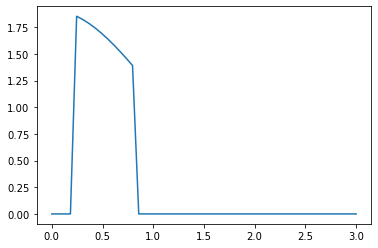

In [7]:
import numpy as np  
import matplotlib.pyplot as plt  
     
distribution = np.linspace(0, np.minimum(rv.dist.b, 3))  
print("Distribution : \n", distribution)  
     
plot = plt.plot(distribution, rv.pdf(distribution))

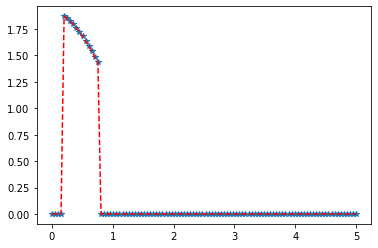

In [8]:
import matplotlib.pyplot as plt  
import numpy as np  
  
x = np.linspace(0, 5, 100)  
     
y1 = truncnorm.pdf(x, a, b)  
y2 = truncnorm.pdf(x, a, b)  
plt.plot(x, y1, "*", x, y2, "r--") 

In [ ]:
from scipy.stats import truncnorm  
import matplotlib.pyplot as plt 
import numpy as np 
  
x = np.linspace(0, 5, 100) 
     
# Varying positional arguments 
y1 = truncnorm.pdf(x, a, b) 
y2 = truncnorm.pdf(x, a, b) 
plt.plot(x, y1, "*", x, y2, "r--") 